In [1]:
# simply examine a single nc file
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# non-Gaussian
#rr_ng=nc.Dataset(f"/home/Chih-Chi.Hu/python_codes/diag_amsua_n15_ges.2022073000.nc4")
#rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/shield_ensreplay_ng_only_scatter_wind_v0/diag_{sensor}_n15_ges.2022071112.nc4")


In [13]:
sensor  = 'atms'
exp_ng  = 'shield_ensreplay_ng_only_scatter_wind_v0'

if sensor == 'cris-fsr':
    rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/cris/{exp_ng}/diag_{sensor}_n20_ges.2022072000.nc4")
else:
    rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/{sensor}/{exp_ng}/diag_{sensor}_n20_ges.2022072000.nc4")
#rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/shield_ensreplay_ng_all_situ_oberr_infla/gdas.20220703/00/atmos/tmp/diag_atms_n20_ges.2022070300.nc4")
#rr_ng=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/s2022_C192_v2p5_edmf1ens0/diag_amsua_metop-b_ges.2022071500.nc4")


In [14]:
print(rr_ng.variables.keys())   # get all variables names


dict_keys(['chaninfoidx', 'frequency', 'polarization', 'wavenumber', 'error_variance', 'mean_lapse_rate', 'use_flag', 'sensor_chan', 'satinfo_chan', 'Channel_Index', 'Observation_Class', 'Latitude', 'Longitude', 'Elevation', 'Obs_Time', 'Scan_Position', 'Sat_Zenith_Angle', 'Sat_Azimuth_Angle', 'Sol_Zenith_Angle', 'Sol_Azimuth_Angle', 'Sun_Glint_Angle', 'Scan_Angle', 'Water_Fraction', 'Land_Fraction', 'Ice_Fraction', 'Snow_Fraction', 'Water_Temperature', 'Land_Temperature', 'Ice_Temperature', 'Snow_Temperature', 'Soil_Temperature', 'Soil_Moisture', 'Land_Type_Index', 'tsavg5', 'sstcu', 'sstph', 'sstnv', 'dta', 'dqa', 'dtp_avh', 'Vegetation_Fraction', 'Snow_Depth', 'tpwc', 'clw_guess_retrieval', 'Sfc_Wind_Speed', 'Cloud_Frac', 'CTP', 'CLW', 'TPWC', 'clw_obs', 'clw_guess', 'Foundation_Temperature', 'SST_Warm_layer_dt', 'SST_Cool_layer_tdrop', 'SST_dTz_dTfound', 'Observation', 'Obs_Minus_Forecast_unadjusted', 'Obs_Minus_Forecast_adjusted', 'Inverse_Observation_Error', 'Sym_Observation_Erro

In [15]:
sensor_chan = rr_ng.variables['sensor_chan'][:]
use_flag    = rr_ng.variables['use_flag'][:]
chaninfoidx = rr_ng.variables['chaninfoidx'][:]
wavenumber  = rr_ng.variables['wavenumber'][:]

In [16]:
print('sensor_chan =', sensor_chan)
print('use_flag =', use_flag)
print('chaninfoidx =', chaninfoidx)
print('wavenumber =', wavenumber)


sensor_chan = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
use_flag = [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1]
chaninfoidx = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
wavenumber = [0.79388255 1.04739126 1.6778274  1.72652776 1.76121842 1.78777012
 1.81458868 1.83260114 1.85128073 1.91100018 1.91100018 1.91100018
 1.91100018 1.91100018 1.91100018 2.94203532 5.52048578 6.11456343
 6.11456343 6.11456343 6.11456343 6.11456343]


In [20]:
ch_ng         = rr_ng.variables['Channel_Index'][:]
inv_obserr_ng = rr_ng.variables['Inverse_Observation_Error'][:]
obserr_ng     = rr_ng.variables['Sym_Observation_Error'][:]
clw_obs_ng    = rr_ng.variables['clw_obs'][:]
clw_model_ng  = rr_ng.variables['clw_guess_retrieval'][:]
omf_ng        = rr_ng.variables['Obs_Minus_Forecast_adjusted'][:]
wspd_ng       = rr_ng.variables['Sfc_Wind_Speed'][:]
fland_ng      = rr_ng.variables['Land_Fraction'][:]
fwater_ng     = rr_ng.variables['Water_Fraction'][:]
symcloud_ng   = 0.5*(clw_obs_ng + clw_model_ng)
qc_ng         = rr_ng.variables['QC_Flag'][:]

In [21]:
chn     = 22
channel = 'ch22'

In [22]:
sea_screen_ng  = (fwater_ng>= 0.99)
land_screen_ng = (fland_ng >= 0.01)
use_ng = np.where((qc_ng == 0)&(ch_ng==chn)&sea_screen_ng)
#use_ng = np.where((qc_ng == 0))


obserr_use_ng     = obserr_ng[use_ng]
inv_obserr_use_ng = inv_obserr_ng[use_ng]
cloud_use_ng      = symcloud_ng[use_ng]
omf_use_ng        = omf_ng[use_ng]
wspd_use_ng       = wspd_ng[use_ng]

In [23]:
def inquire_nongauss_table(table_name, input_cld, input_innov):

    # first read table in:
    read_cloud_bin_next = False
    read_bias_next      = False
    read_stdev_next     = False
    ct = 0
    with open(table_name, 'r') as file:
        # Read the file line by line into a list
        lines = file.readlines()
    
        # Process each line
        for line in lines:
            # basic parameters
            if line[0:9] == 'max_range':
                max_range = float(line[17:])
            elif line[0:2] == 'dx':
                dx        = float(line[17:])
            elif line[0:9] == 'bdy_slope':
                bdy_slope = float(line[17:])
            elif line[0:13] == 'num_cloud_cat':
                num_cloud_cat = float(line[17:])
                stdev = np.zeros((int(num_cloud_cat), 2*int(max_range/dx)+1))
        
            # cloud bin
            if line[0:11] == 'cloud_bin::':
                read_cloud_bin_next = True
                continue
            
            if read_cloud_bin_next:
                cloud_bin = np.array(line.split(), dtype=np.float64)
                read_cloud_bin_next = False
        
            if line[0:6] == 'bias::':
                read_bias_next = True
                continue
            
            if read_bias_next:
                bias = np.array(line.split(), dtype=np.float64)
                read_bias_next = False
            
            if line[0:7] == 'stdev::':
                read_stdev_next = True
                continue
            
            if read_stdev_next:
                stdev[ct,:] = np.array(line.split(), dtype=np.float64)
                ct+=1
                if ct>=num_cloud_cat:
                    read_stdev_next = False
                    
    
    # then interpolate the table to get the standard deviation:
    cc = int(min(num_cloud_cat-1, np.where(input_cld - cloud_bin >= 0)[0][-1]))

    # move the innovation to 'mode relative innovation':
    input_innov = input_innov + bias[cc]
    
    # interpolate to get the stdev:
    if input_innov <= -max_range:
        output_stdev = stdev[cc,0] + bdy_slope*(-max_range - input_innov)
    elif input_innov >= max_range:
        output_stdev = stdev[cc,-1] + bdy_slope*(input_innov - max_range)
    else:
        output_stdev = np.interp(input_innov, np.arange(-max_range, max_range+dx, dx), stdev[cc,:] )

    return output_stdev

In [24]:
table_err = np.zeros(len(cloud_use_ng))
for i in range(len(cloud_use_ng)):
    table_err[i] = inquire_nongauss_table(f'/home/Chih-Chi.Hu/python_codes/tables/non_Gaussian_{sensor}_{channel}_OmF_sym_cld_qc_00_03.txt', cloud_use_ng[i], omf_use_ng[i])
    #table_err[i] = inquire_nongauss_table(f'/home/Chih-Chi.Hu/python_codes/tables/non_Gaussian_{sensor}_{channel}_OmF_no_predictor_qc_00_03.txt', cloud_use_ng[i], omf_use_ng[i])

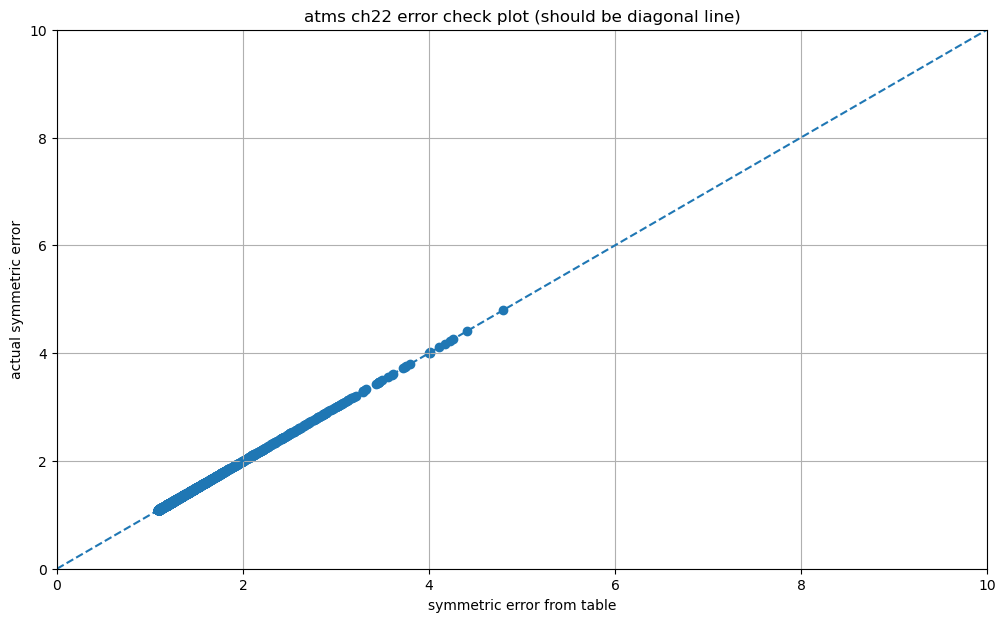

In [25]:
# sanity check plot
# plot the error predicted by error table versus the errors that are actually stored in the netcdf file:

plt.scatter(table_err, obserr_use_ng)
plt.plot([0,70],[0,70],linestyle='--')
#plt.axis([0,20,0,20])
#plt.axis([0,5,0,5])
plt.axis([0,10,0,10])
plt.xlabel('symmetric error from table')
plt.ylabel('actual symmetric error')
plt.grid(True)
plt.title(f'{sensor} {channel} error check plot (should be diagonal line)')
plt.show()